In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [11]:
df=pd.read_csv('creditcard.csv', on_bad_lines='skip')

/tmp/ipython-input-3861534700.py:1: DtypeWarning: Columns (2,4,5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('creditcard.csv', on_bad_lines='skip')


In [12]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,1


In [13]:
df.fillna(0, inplace=True)


In [14]:
cols_to_convert = ['V2', 'V4', 'V5', 'V14']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
df.fillna(0, inplace=True)


In [16]:
df['Class'].value_counts()


,count
Class,
0.0,327783
1.0,607


In [17]:
upper_limit = np.percentile(df['Amount'], 99)


In [18]:
df['Amount'] = np.clip(df['Amount'], 0, upper_limit)


In [19]:
X = df.drop('Class', axis=1)


In [20]:
y = df['Class']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
model = LogisticRegression(max_iter=1000)


In [23]:
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9989037425012942


In [27]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     65564
         1.0       0.73      0.58      0.65       114

    accuracy                           1.00     65678
   macro avg       0.87      0.79      0.82     65678
weighted avg       1.00      1.00      1.00     65678



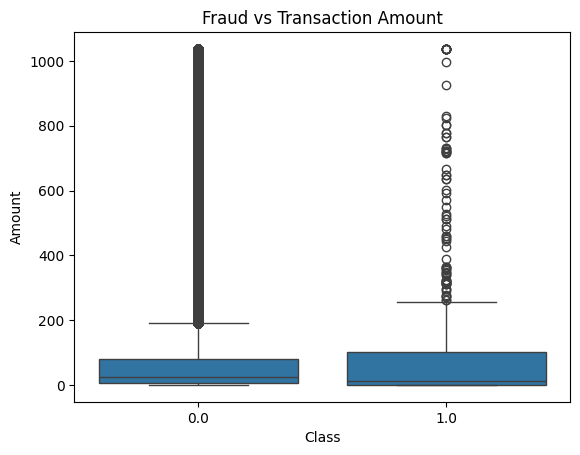

In [28]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Fraud vs Transaction Amount")
plt.show()


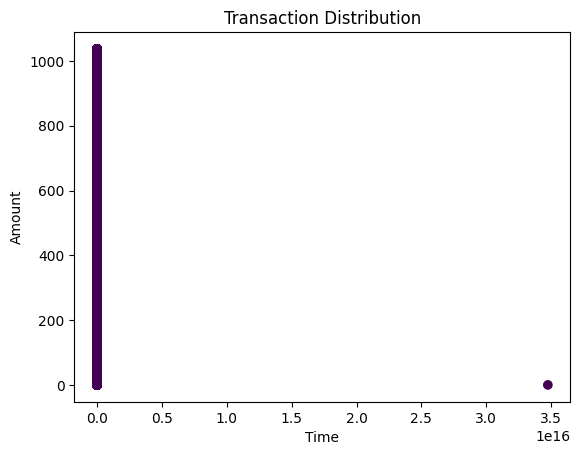

In [29]:
plt.scatter(df['Time'], df['Amount'], c=df['Class'])
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Transaction Distribution")
plt.show()
